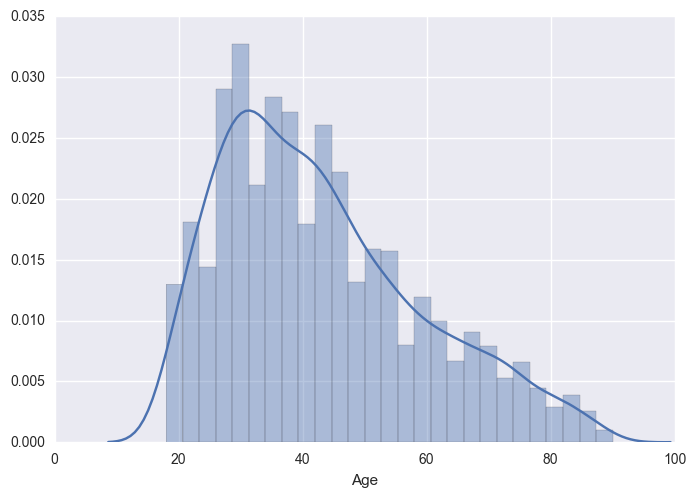

In [195]:
%matplotlib inline
from pandas import read_csv, DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

data = read_csv('drivers_5000.csv')

sns.distplot(data.Age, label="Age")

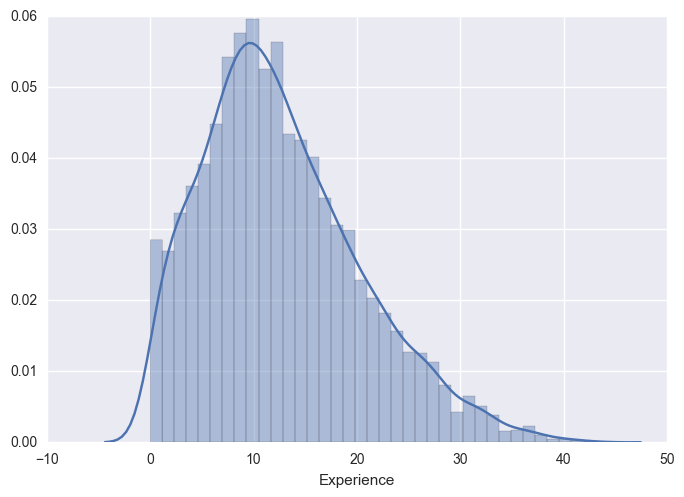

In [196]:
sns.distplot(data.Experience)

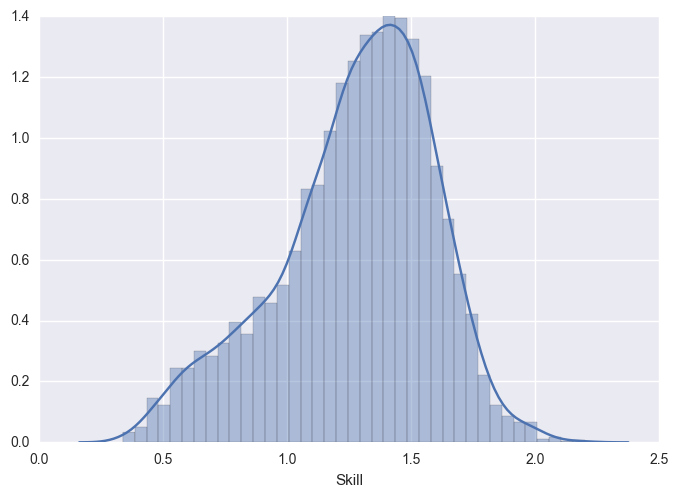

In [197]:
sns.distplot(data.Skill)

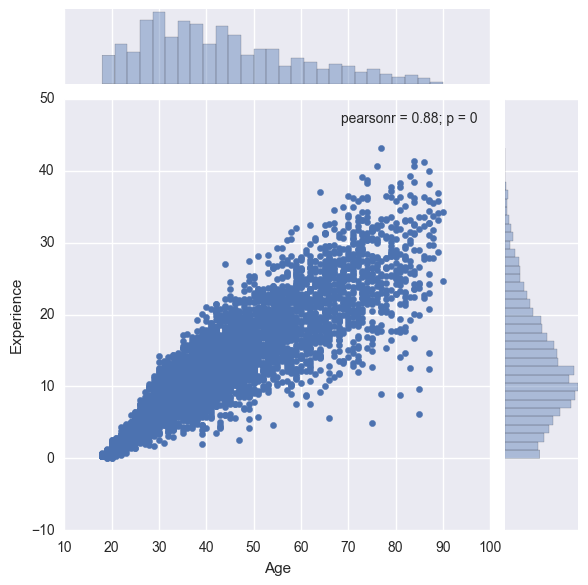

In [198]:
sns.jointplot(x="Age", y="Experience", data=data);

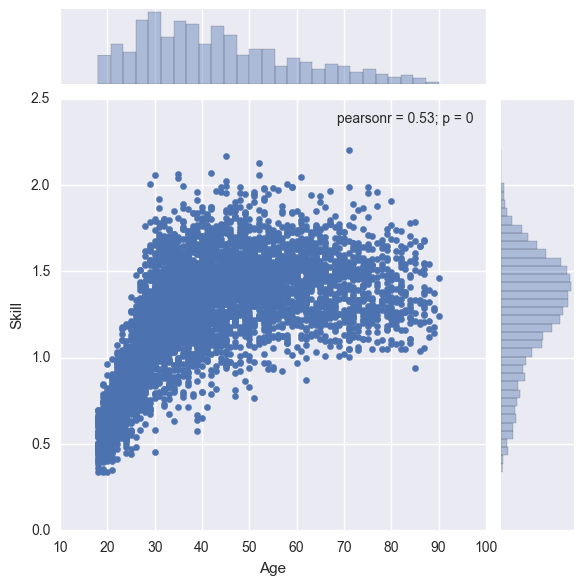

In [199]:
sns.jointplot(x="Age", y="Skill", data=data);

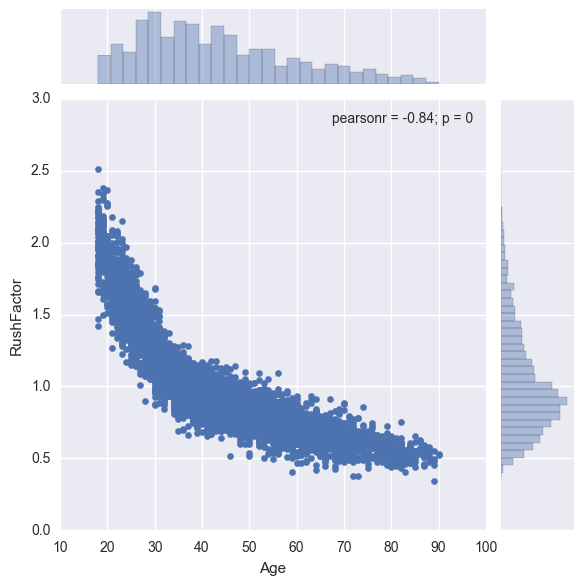

In [200]:
sns.jointplot(x="Age", y="RushFactor", data=data);

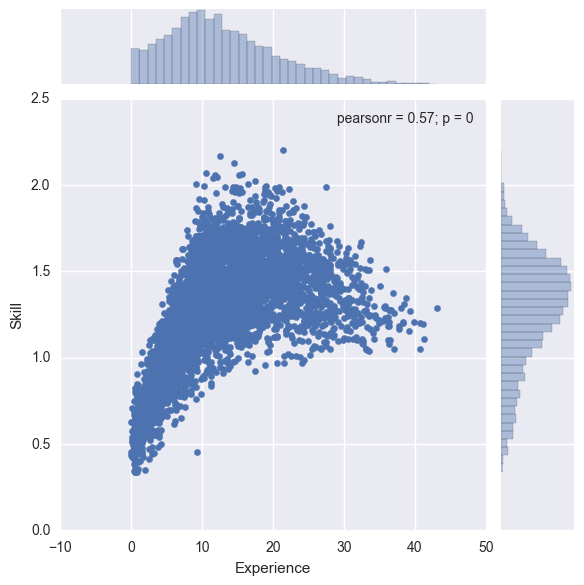

In [201]:
sns.jointplot(x="Experience", y="Skill", data=data);

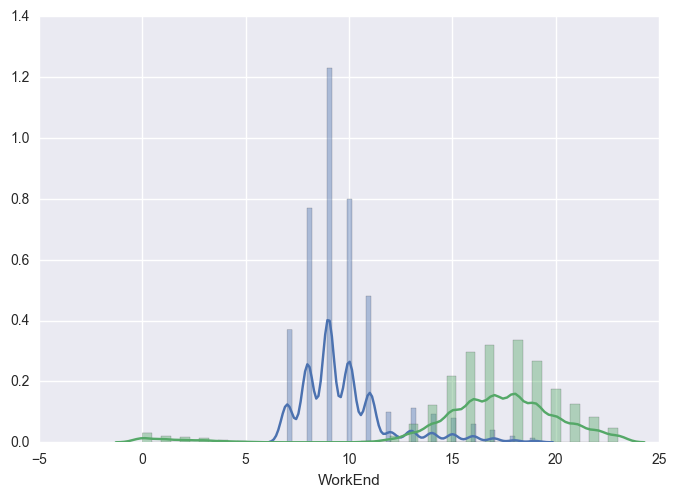

In [202]:
sns.distplot(data.WorkStart, label="Work start")
sns.distplot(data.WorkEnd, label="Work end")

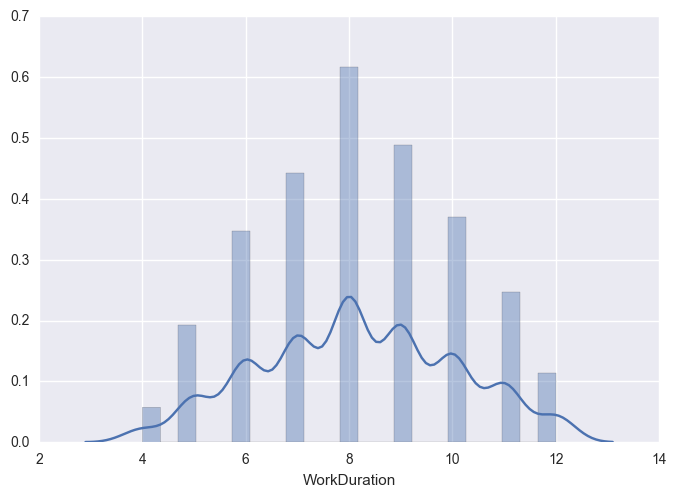

In [203]:
sns.distplot(data.WorkDuration, label="Work duration")

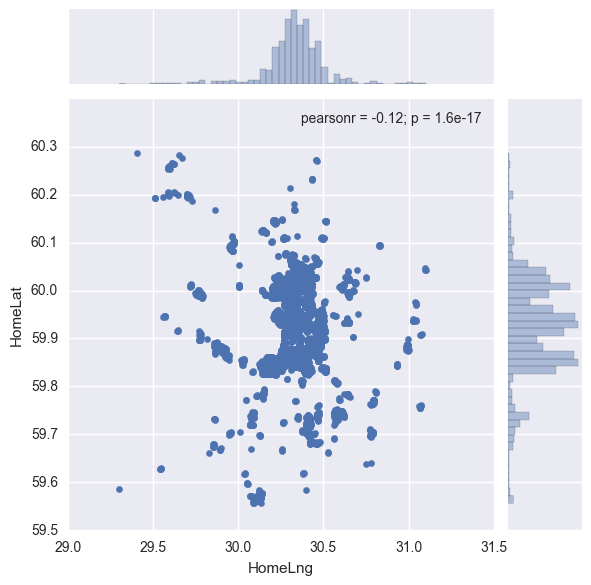

In [204]:
sns.jointplot(x="HomeLng", y="HomeLat", data=data);

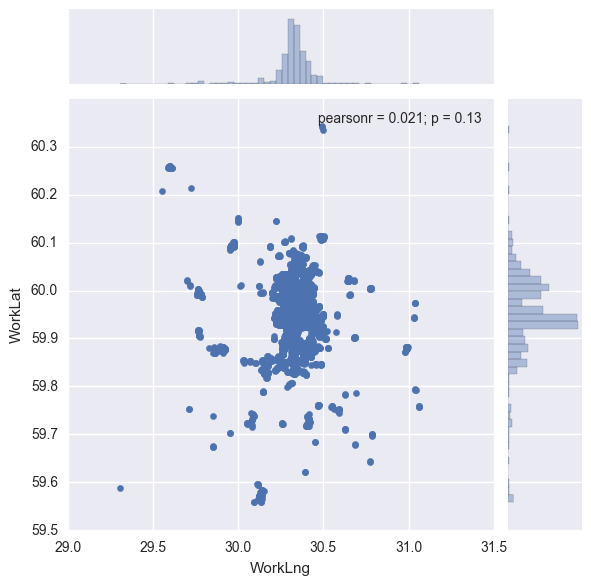

In [205]:
sns.jointplot(x="WorkLng", y="WorkLat", data=data);

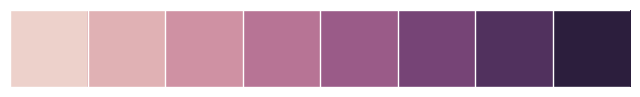

In [206]:
pal = sns.palplot(sns.cubehelix_palette(8))

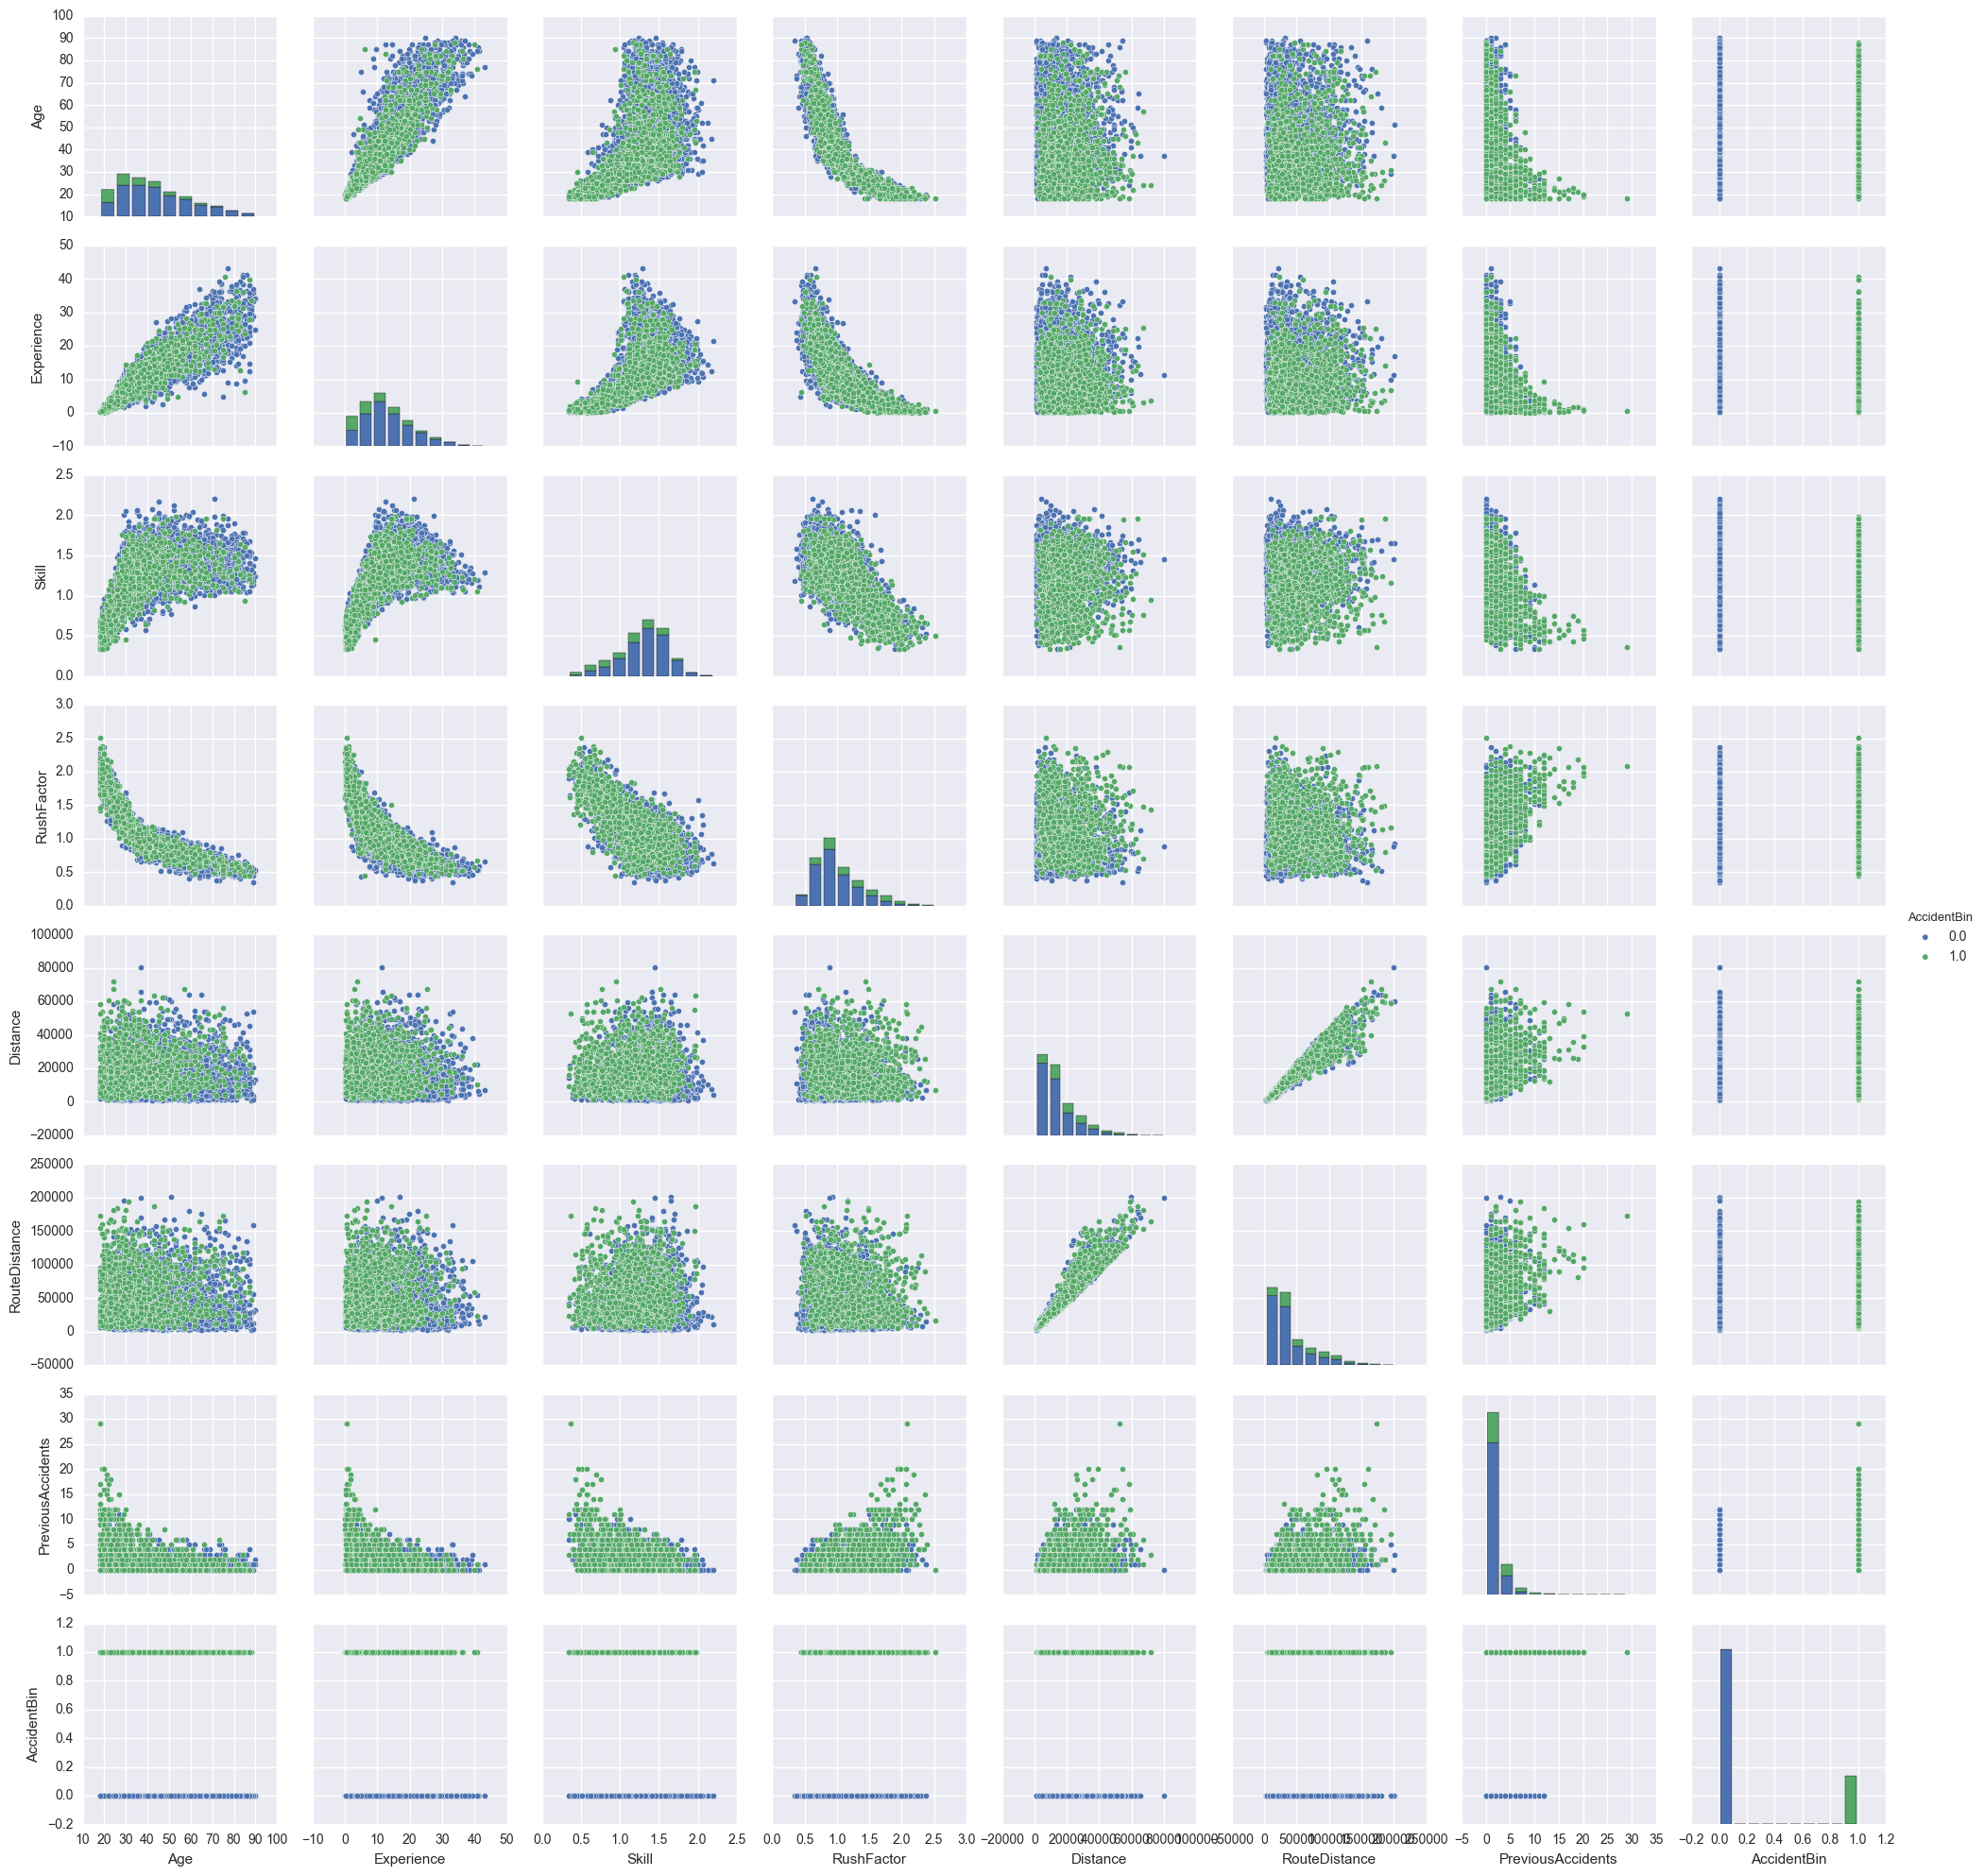

In [207]:
data.at[data['Accidents'] > 0, 'AccidentBin'] = 1
data.at[data['Accidents'] == 0, 'AccidentBin'] = 0
#sns.pairplot(data2, hue="Accidents", palette=pal);
data2 = data.drop(['WorkStart','WorkDuration','WorkEnd','WorkLng','WorkLat','HomeLng','HomeLat','Accidents'], axis=1)
sns.pairplot(data2, hue="AccidentBin");

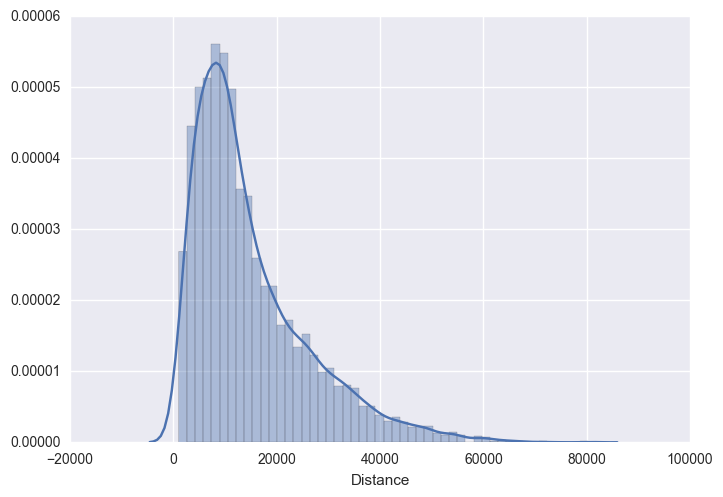

In [208]:
sns.distplot(data.Distance)

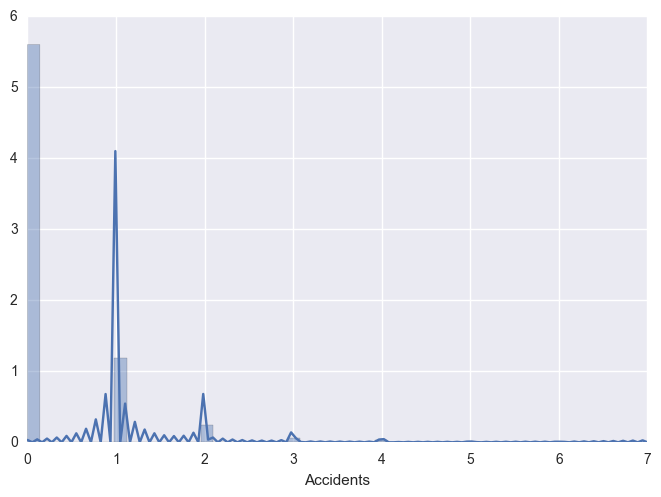

In [209]:
sns.distplot(data.Accidents)

In [210]:
data2.describe()

,Age,Experience,Skill,RushFactor,Distance,RouteDistance,PreviousAccidents,AccidentBin
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,42.91680,12.698620,1.276583,1.026877,14924.542988,41038.062520,1.449800,0.216200
std,16.14845,7.658944,0.314914,0.359837,11238.799702,33203.998061,2.140653,0.411693
min,18.00000,0.000000,0.338000,0.346000,1024.640000,2512.266000,0.000000,0.000000
25%,30.00000,7.100000,1.093750,0.769000,6908.492500,18106.418750,0.000000,0.000000
50%,40.00000,11.600000,1.321000,0.946000,11439.509000,29141.980000,1.000000,0.000000
75%,53.00000,17.300000,1.504000,1.227250,19982.064500,54194.947250,2.000000,0.000000
max,90.00000,43.100000,2.200000,2.513000,80299.590000,201650.074000,29.000000,1.000000


In [211]:
data2.corr()

,Age,Experience,Skill,RushFactor,Distance,RouteDistance,PreviousAccidents,AccidentBin
Age,1.000000,0.881989,0.526847,-0.843132,0.009569,0.015212,-0.344367,-0.204308
Experience,0.881989,1.000000,0.571138,-0.786276,-0.001103,0.002568,-0.354687,-0.205037
Skill,0.526847,0.571138,1.000000,-0.673375,-0.025378,-0.017735,-0.444914,-0.262518
RushFactor,-0.843132,-0.786276,-0.673375,1.000000,0.008203,0.004969,0.472018,0.264171
Distance,0.009569,-0.001103,-0.025378,0.008203,1.000000,0.960608,0.459951,0.270838
RouteDistance,0.015212,0.002568,-0.017735,0.004969,0.960608,1.000000,0.475684,0.273144
PreviousAccidents,-0.344367,-0.354687,-0.444914,0.472018,0.459951,0.475684,1.000000,0.327259
AccidentBin,-0.204308,-0.205037,-0.262518,0.264171,0.270838,0.273144,0.327259,1.000000


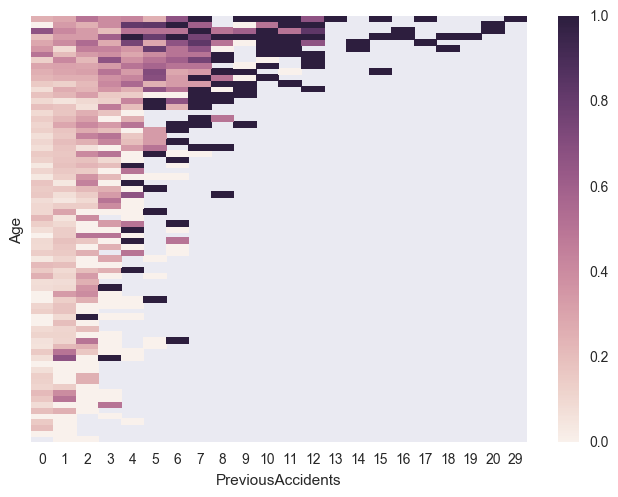

In [212]:
#sns.swarmplot(data = data, x = "Accidents", y = "Age")
pivot = data.pivot_table(index='Age', columns='PreviousAccidents', values='AccidentBin')
sns.heatmap(pivot, yticklabels=False)